An R notebook to examine the different prior values set by Michael

$\rho = \exp\left(\frac{-1}{8 l^2}\right)$
or if you try to understand it with the correlation length $l^2$, you get

$l^2 = \frac{-1}{8 \ln(\rho)}$


## $\beta$ distribution prior for $\rho$
$\rho_a = 1.0$  which is the shape1 parameter    
$\rho_b = 0.1$  which is the shape2 parameter    
$\rho_{proposal step size} = 0.2$ 


In [1]:
x_rho = seq(1e-3, 1., 1e-2)

In [2]:
l_sq = function(rho){
    -1 / (8 * log(rho))
}

Michael 's priors

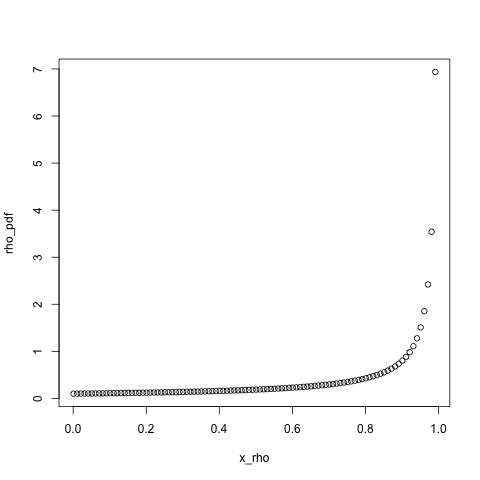

In [3]:
rho_pdf = dbeta(x_rho, 1.0, 0.1)
plot(x_rho, rho_pdf)

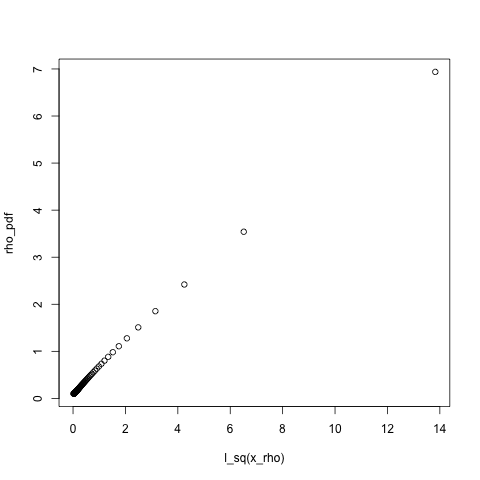

In [4]:
plot(l_sq(x_rho), rho_pdf)

the prior pdf values of $\rho$ seems to increase as $\rho$ without bound.
But we know that should not be true, at least we should show that we are clueless what $l^2$ should be.

# flat $\beta$ prior 

$f(x;\alpha, \beta) = \frac{1}{B(\alpha, \beta)}x^{\alpha-1} (1-x)^{\beta-1}$
where $B(\alpha, \beta)$ is a normalization constant.

We put   
$\alpha = 1.\\
\beta = 1. $


for a uniform prior.

# change the prior

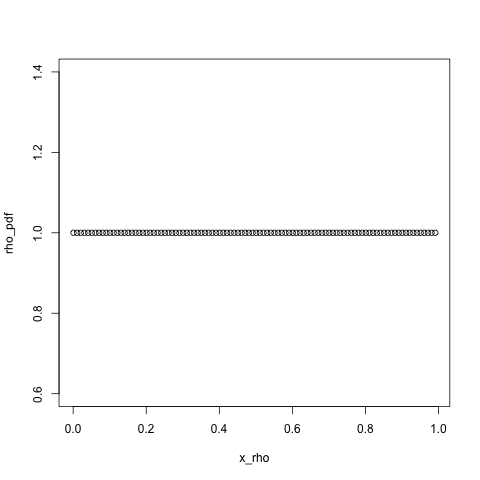

In [5]:
rho_pdf = dbeta(x_rho, 1., 1.)
plot(x_rho, rho_pdf)

## $\gamma$ distribution prior for $\lambda_{\epsilon}$
$\alpha = 200.0$ shape parameter  
$\beta = 1.0$   rate parameter 

$ 1 < \lambda_{\epsilon} < 2e4 $ 

Michael's choice for the prior

From R documentation:
The Gamma distribution with parameters `shape` = $\alpha$ and `rate` = $\beta$ has density

$f(x)= \frac{\beta^\alpha}{\Gamma(a)} x^{(a-1)} \exp(-(\beta x))   $           
     
for $x >= 0, \alpha > 0$ and $\beta > 0$.  
(Here $\Gamma(a)$ is the function
implemented by R's `gamma()` and defined in its help.  Note that $a = 0$ corresponds to the trivial distribution with all mass at point 0.)

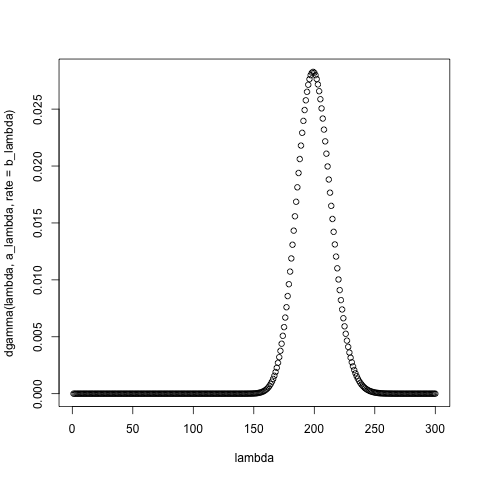

In [7]:
lambda = seq(1.0, 3e2)
a_lambda = 200.
b_lambda = 1.0
plot(lambda, dgamma(lambda, a_lambda, rate=b_lambda))

This is an extremely peaky prior. We will replace this for a less informative prior.

# less informative prior 

we choose a normal distribution for $\lambda_{\epsilon}^{-1}$ with a big variance term


In particular, we have to respect: 

$ 0 < b_l < \lambda_{\epsilon}^{-1} < \lambda_{GP}^{-1} = 1$


For a well-conditioned $\Sigma_{,hijk}$ we put a relatively strong prior for a small nugget.

In [12]:
d_trunc_norm = function(nugget, lower_bound, sd=1e3){
    # Do not want the nugget term to blow up in any way
    if(nugget <= 1e-10) return(0)
    else return (dnorm(nugget, mean=5*lower_bound, sd=sd))
}

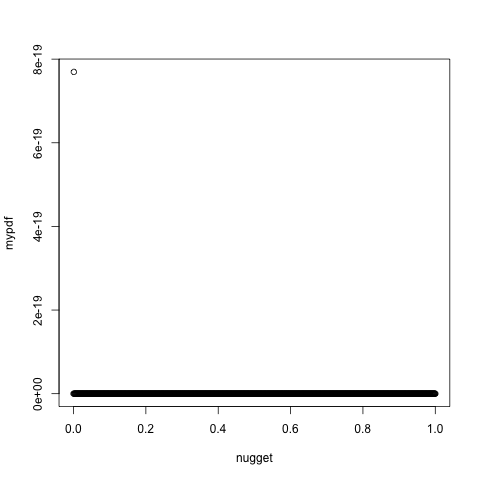

In [28]:
nugget = seq(0, 1, 0.001)
mypdf = sapply(nugget, 
               function(x) d_trunc_norm(x, lower_bound=1e-20, sd=1e-4))
plot(nugget, mypdf)

In [ ]:
nugget = seq(0, 1, 0.001)
mypdf = sapply(nugget, 
               function(x) d_trunc_norm(x, lower_bound=1e-20, sd=1e-4))
plot(nugget, mypdf)